# Chapter 4 - Testing

First import the required modules (with abbreviated names).

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from util_fig import myfigure        # plotting routine from Steven


print(np.square(np.array([1,2,3,4])))

[ 1  4  9 16]


In [2]:
# Define the solution function, u(x,t;lam).
def uxt(x,t,lam):

    
    ## Original.
    
    
    X = np.array(3*np.sin(np.pi*x) + np.sin(3*np.pi*x))
    T = np.array(np.exp(-lam * math.pow(np.pi,2) * t))
    return np.outer(T, X)

In [3]:
def uxt2(x,t,lam):
    
    
    ## Using stack.

    
    x = np.array(x)
    t = np.array(t)
    lam = np.array(lam)

    # Spatial locations.
    X = 3*np.sin(np.pi*x) + np.sin(3*np.pi*x)

    # Time points.
    T = np.exp(-math.pow(np.pi,2)*np.outer(lam,t))
    

    # Compute solution through outer product and return values.
    return T, np.stack([T.T*i for i in X])

In [4]:
def uxt5(x,t,lam):
    
    x = np.array(x)
    t = np.array(t)
    lam = np.array(lam)

    # Spatial locations.
    X = 3*np.sin(np.pi*x) + np.sin(3*np.pi*x)
    
    if lam.ndim==1:
        
        print("using vector approach")
        
        # Time points.
        T = np.exp(-math.pow(np.pi,2)*np.outer(lam,t))
        
        # Compute solution through outer product and return values.
        U = np.stack([T.T*i for i in X])
        
    elif lam.ndim==0:
        print("using scalar approach")
        
        T = np.array(np.exp(-lam * math.pow(np.pi,2) * t))
        U = np.outer(T,X)

    return U 

In [5]:
def uxt3(x,t,lam):
    
    
    ## Pre-allocating storage and stacking manually.
    
    
    x = np.array(x)
    t = np.array(t)
    lam = np.array(lam)

    # Spatial locations.
    X = 3*np.sin(np.pi*x) + np.sin(3*np.pi*x)

    # Time points.
    T = np.exp(-math.pow(np.pi,2)*np.outer(lam,t))   
    
    U = np.zeros((int(x.shape[0]), int(t.shape[0]), int(lam.shape[0])))
    for i,j in enumerate(X):
        U[i,:,:] = T.T*j
        
    return U

In [6]:
def uxt4(x,t,lam):
    
    
    ## Triple for loop.
    
    
    x = np.array(x)
    t = np.array(t)
    lam = np.array(lam)
    
    U = np.zeros((int(x.shape[0]), int(t.shape[0]), int(lam.shape[0])))
        
    for i in range(int(x.shape[0])):
        for j in range(int(t.shape[0])):
            for k in range(int(lam.shape[0])):
                U[i,j,k] = (3*np.sin(np.pi*x[i]) + np.sin(3*np.pi*x[i])) * np.exp(-math.pow(np.pi,2)*lam[k]*t[j])
                
    return U
                
    

In [7]:
x = np.array([0.2, 0.4, 0.6, 0.8])
t = 0.05*np.array([1/3, 2/3, 1.])
lam = np.array([5, 4.5, 7, 2, 3.56])


"""
print(lam.ndim)
print(lam.shape)

print(x.ndim)
print(x.shape)

#x = np.array([1, 2, 3, 4])
#t = np.array([0, 0, 0])
#lam = np.array([1, 0, 1, 0, 1])


U1 = np.zeros((4,3,5))
for i,j in enumerate(lam):
    U1[:,:,i] = uxt(x,t,j).T


T, U2 = uxt2(x,t,lam)

U3 = uxt3(x,t,lam)

U4 = uxt4(x,t,lam)

U5 = uxt5(x,t,lam)

print(U1==U5)

print(U1.shape)
print(U2.shape)
print(U3.shape)
print(U4.shape)
print(U5.shape)

print(U1[:,:,1])
print(U2[:,:,1])
print(U3[:,:,1])
print(U4[:,:,1])
print(U5[:,:,1])
"""
U5 = uxt5(x,t,lam)
print(U5.shape)

U6 = U5.reshape(-1, U5.shape[2])
print(U6.shape)



using vector approach
(4, 3, 5)
(12, 5)


In [8]:
from scipy.stats import multivariate_normal as mvNorm

theta = np.zeros((4,3))

Fx = np.stack([mvNorm.pdf(theta[:,i], np.zeros(4), 5) for i in range(theta.shape[1])])

print(Fx)

Fx2 = np.zeros(3)
for i in range(theta.shape[1]):
    Fx2[i] = mvNorm.pdf(theta[:,i], np.zeros(4), 5)
    
print(Fx2)
    

[0.00101321 0.00101321 0.00101321]
[0.00101321 0.00101321 0.00101321]


In [9]:
x = np.array([0.2,0.4,0.6,0.8])
t = np.array([1/3, 2/3, 1])
lam = np.array([1, 0, 1, 0, 1])

# Spatial locations.
X = 3*np.sin(np.pi*x) + np.sin(3*np.pi*x)

# Time points.
T = np.exp(-math.pow(np.pi,2)*np.outer(lam,t))

print(-math.pow(np.pi,2))
print(np.outer(lam,t))
print(-math.pow(np.pi,2)*np.outer(lam,t))
print(T)

x.shape[0]

-9.869604401089358
[[0.33333333 0.66666667 1.        ]
 [0.         0.         0.        ]
 [0.33333333 0.66666667 1.        ]
 [0.         0.         0.        ]
 [0.33333333 0.66666667 1.        ]]
[[-3.28986813 -6.57973627 -9.8696044 ]
 [-0.         -0.         -0.        ]
 [-3.28986813 -6.57973627 -9.8696044 ]
 [-0.         -0.         -0.        ]
 [-3.28986813 -6.57973627 -9.8696044 ]]
[[3.72587622e-02 1.38821536e-03 5.17231862e-05]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.72587622e-02 1.38821536e-03 5.17231862e-05]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.72587622e-02 1.38821536e-03 5.17231862e-05]]


4

In [10]:
x = np.array([0.2, 0.4, 0.6, 0.8])

t = np.array([0.3, 0.6, 0.890])

lam = np.array([2,3,4,5,6])


U1 = np.zeros((3,4,5))
for i,j in enumerate(lam):
    U1[:,:,i] = uxt(x,t,j)


T, U2 = uxt2(x,t,lam)

print(U1.shape)
print(U2.shape)

(3, 4, 5)
(4, 3, 5)


In [11]:
# Data components (in dictionary).


# Time. 
ip_data = {
    'T': 0.05,  # final time
    'nt': 3     # number of temporal measurements
}
ip_data['t_obs'] = ip_data['T']*np.arange(1,ip_data['nt']+1)/ip_data['nt']   # measurement times


# Space
ip_data['nx'] = 4                                                   # number of spatial measurements
ip_data['x_obs'] = np.arange(1,ip_data['nx']+1)/(1+ip_data['nx'])   # observation locations


# Spatial locations (plotting).
x = np.linspace(0,1,50)


# True observations.
ip_data['lam'] = 5*np.pi/3                                                     # thermal conductivity
ip_data['G'] = uxt(ip_data['x_obs'],ip_data['t_obs'],ip_data['lam']).ravel()   # true obs
ip_data['nd'] = ip_data['nx']*ip_data['nt']                                    # number of obs


# Noise.
ip_data['seed'] = 0                                                           # seed RNG
np.random.seed(0)
ip_data['noise_ratio'] = 5/100                                                    # 5% signal-noise ratio
ip_data['sig_rho'] = np.sqrt(ip_data['noise_ratio'] * np.mean(ip_data['G']))      # noise std
ip_data['rho_noise'] = np.random.normal(0,ip_data['sig_rho'],(ip_data['nd'],1)).ravel()   # noise value


# Noisy data.
ip_data['d'] = ip_data['G'] + ip_data['rho_noise']


# Print dictionary to screen.
for key in ip_data:
    print(key, ip_data[key])

T 0.05
nt 3
t_obs [0.01666667 0.03333333 0.05      ]
nx 4
x_obs [0.2 0.4 0.6 0.8]
lam 5.235987755982989
G [1.14716077 0.95739325 0.95739325 1.14716077 0.48481133 0.40461207
 0.40461207 0.48481133 0.20489022 0.17099654 0.17099654 0.20489022]
nd 12
seed 0
noise_ratio 0.05
sig_rho 0.16757744938182473
rho_noise [ 0.29561539  0.06705732  0.16401441  0.37552317  0.3129606  -0.16376973
  0.15921339 -0.02536405 -0.01729715  0.06880705  0.02413845  0.24370345]
d [1.44277616 1.02445058 1.12140767 1.52268394 0.79777194 0.24084234
 0.56382547 0.45944728 0.18759307 0.23980359 0.19513499 0.44859367]


[0, 1, 0, 3]

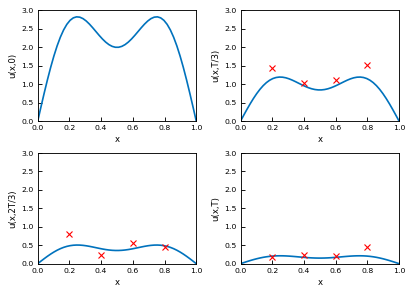

In [12]:
# Plot data (seperate commands)


# Matrix representation of noisy data.
d_mat = np.reshape(ip_data["d"],(ip_data["nt"],ip_data["nx"]))


# Subplot routine.
fig, (ax1, ax2, ax3, ax4) = myfigure(nrows=2, ncols=2)

ax1.plot(x, np.squeeze(uxt(x,0,ip_data['lam'])))
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,0)')    
ax1.axis([0, 1, 0, 3])

ax2.plot(x, np.squeeze(uxt(x,ip_data['t_obs'][0],ip_data['lam'])))
ax2.plot(ip_data['x_obs'], d_mat[0,:], 'xr')
ax2.set_xlabel('x')
ax2.set_ylabel('u(x,T/3)')    
ax2.axis([0, 1, 0, 3])

ax3.plot(x, np.squeeze(uxt(x,ip_data['t_obs'][1],ip_data['lam'])))
ax3.plot(ip_data['x_obs'], d_mat[1,:], 'xr')
ax3.set_xlabel('x')
ax3.set_ylabel('u(x,2T/3)')    
ax3.axis([0, 1, 0, 3])

ax4.plot(x, np.squeeze(uxt(x,ip_data['t_obs'][2],ip_data['lam'])))
ax4.plot(ip_data['x_obs'], d_mat[2,:], 'xr')
ax4.set_xlabel('x')
ax4.set_ylabel('u(x,T)')    
ax4.axis([0, 1, 0, 3])

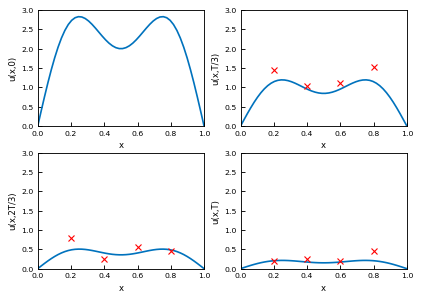

In [13]:
# Labels for y-axes.
ylabs = ['u(x,0)', 'u(x,T/3)','u(x,2T/3)','u(x,T)']

# Subplot routine from Steven.
fig, ax = myfigure(nrows=2, ncols=2)


for i,axi in enumerate(ax):
    
    if i == 0:
        # Initial data.
        axi.plot(x, np.squeeze(uxt(x,0,ip_data['lam'])))
    else:
        # Measurement times data.
        axi.plot(x, np.squeeze(uxt(x,ip_data['t_obs'][i-1],ip_data['lam'])))
        axi.plot(ip_data['x_obs'], d_mat[i-1,:], 'xr')
        
    axi.set_xlabel('x')
    axi.set_ylabel(ylabs[i])    
    axi.axis([0, 1, 0, 3])

plt.savefig('test.pdf', dpi=300)

In [14]:
# Function to convert (mu,sigma) [Normal] to (m,s) [logNorm].
# Y = exp(X): X~N(m,s^2); Y~logN(mu,sigma^2)

def m_s_from_mu_sig(mu,sig):

    c = 1 + np.power(sig/mu,2) # constant
    
    m = np.log(mu/np.sqrt(c))
    s = np.sqrt(np.log(c))
    
    return m,s

In [15]:
from scipy.stats import uniform as Unif
from scipy.stats import norm as Norm
from scipy.stats import multivariate_normal as mvNorm


# Posterior
def posterior(theta, prior, ip_data):
    
    # Ensure input theta is nparray.
    theta = np.array(theta)
    
    # Prior density.
    if prior[0] == "unif":
        p0 = Unif.pdf(theta, prior[1], prior[2]-prior[1])  # Uniform pdf
    elif prior[0] == "normal":
        p0 = Norm.pdf(theta, prior[1], prior[2]) # Gaussian pdf

    
#    # Forward evaluation.
#    F = uxt(ip_data['x_obs'], ip_data['t_obs'], np.exp(theta)).ravel()

#    # Evaluate likelihood (multivariate Normal).
#    L = mvNorm.pdf(F, ip_data['d'], ip_data['sig_rho'])


    # Single theta value.
    if theta.ndim == 0:
        F = uxt5(ip_data['x_obs'], ip_data['t_obs'], np.exp(theta)).ravel()
        L = mvNorm.pdf(F, ip_data['d'], ip_data['sig_rho'])
        
    # Multiple theta values.
    elif theta.ndim == 1:
        F = uxt5(ip_data['x_obs'], ip_data['t_obs'], np.exp(theta))
        F = F.reshape(-1, F.shape[2])
        
        L = np.stack([mvNorm.pdf(F[:,i], ip_data['d'], ip_data['sig_rho']) for i in range(theta.shape[0])])
    
    
    # Return evaluation of the posterior., prior and likelihood.
    return p0*L, p0, L





using vector approach


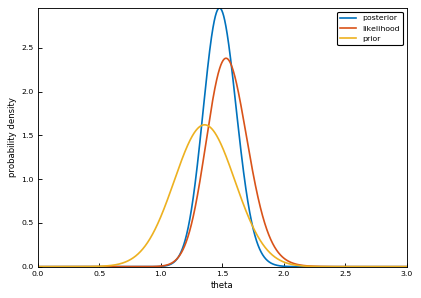

In [16]:
# Test the posterior by plotting it.

Nt = 5000   # number of evaluation points

tv = np.linspace(0,3, Nt) # theta values
#p0 = np.zeros(Nt)     # prior evaluations
#Lv = np.zeros(Nt)     # likelihood evaluations


# Prior parameters
m, s = m_s_from_mu_sig(4,1)
prior = ["normal", m, s]


"""
for n in range(Nt):
    dummy_var, p0[n], Lv[n] = posterior(tv[n], prior, ip_data)
    
    
# Posterior evaluations
pv = p0*Lv
"""


pv, p0, Lv = posterior(tv, prior, ip_data)

# Normalise.
p0 = p0/np.trapz(p0,tv)
Lv = Lv/np.trapz(Lv,tv)
pv = pv/np.trapz(pv,tv)


# Plot.
fig, ax = myfigure()

ax.plot(tv, pv, label='posterior')
ax.plot(tv, Lv, label='likelihood')
ax.plot(tv, p0, label='prior')
ax.set_xlabel('theta')
ax.set_ylabel('probability density')    
leg = ax.legend();


In [17]:
# MCMC Routine

NB = int(1e2)  # no. burn in samples
N = int(1e2)   # no samples

nbins = 100  # number of histogram bins

sig_q = 5.5e-1  # proposal standard deviation



# MCMC Sampling.
tvec = np.zeros(N+NB)  # storage for samples values of theta
count = 0 # counter for number of accepted samples

# Initial state
tvec[0] = np.log(ip_data['lam'])  # true value


# Evaluate posterior at true state.
post, dummy1, dummy2 = posterior(tvec[0],prior,ip_data)


# Monte Carlo loop
for n in range(NB+N-1):
    
    t_p = Norm.rvs(tvec[n],sig_q)  # proposal value
    
    post_p, dummy1, dummy2 = posterior(t_p, prior, ip_data) # evaluate posterior at proposal

    alpha = min(1, post_p/post)  # acceptance probability
    
    z = Unif.rvs()
    
    if z < alpha:
        # accept
        tvec[n+1] = t_p
        post = post_p
        
        if n > NB:
            count = count + 1
            
    else:
        # reject
        tvec[n+1] = tvec[n]
    
    
    # Output progress updates to screen.
    if n < NB-2:
        if round(100*(n+2)/NB) > round(100*(n+1)/NB):
            print("Burning in, progress: " + str(n+2) + "/" + str(NB) + " samples computed, " + str(round(100*(n+2)/NB)) + "% complete.")
    elif n == NB-2:
        print("Burn in complete.")
           
    elif n > NB-2:
        if round(100*(n-NB+2)/N) > round(100*(n-NB+1)/N):
            print(n-NB+2)
            print("Progress: " + str(n-NB+2) + "/" + str(N) + " samples computed, " + str(round(100*(n-NB+2)/N)) + "% complete.")    

# Proportion of proposals accepted.            
prop = count/N
print("Proportion of proposals accepted is " + str(prop) +  ".")


using scalar approach
using scalar approach
Burning in, progress: 2/100 samples computed, 2% complete.
using scalar approach
Burning in, progress: 3/100 samples computed, 3% complete.
using scalar approach
Burning in, progress: 4/100 samples computed, 4% complete.
using scalar approach
Burning in, progress: 5/100 samples computed, 5% complete.
using scalar approach
Burning in, progress: 6/100 samples computed, 6% complete.
using scalar approach
Burning in, progress: 7/100 samples computed, 7% complete.
using scalar approach
Burning in, progress: 8/100 samples computed, 8% complete.
using scalar approach
Burning in, progress: 9/100 samples computed, 9% complete.
using scalar approach
Burning in, progress: 10/100 samples computed, 10% complete.
using scalar approach
Burning in, progress: 11/100 samples computed, 11% complete.
using scalar approach
Burning in, progress: 12/100 samples computed, 12% complete.
using scalar approach
Burning in, progress: 13/100 samples computed, 13% complete

In [18]:
xbv = [1,2,3,4,5,6]
print(xbv)

print(xbv[-2:])

[1, 2, 3, 4, 5, 6]
[5, 6]


In [19]:
chain = tvec[NB:]
print(len(chain))
print(chain[96:102])

100
[1.36017765 1.36017765 1.36017765 1.36017765]


0.37
[1.42393492 1.42393492 1.57081289 1.57081289 1.47646241 1.47646241
 1.47646241 1.2734124  1.2734124  1.2734124  1.63380745 1.62042809
 1.62042809 1.62042809 1.56644537 1.56644537 1.56644537 1.56644537
 1.34091804 1.34091804]
100


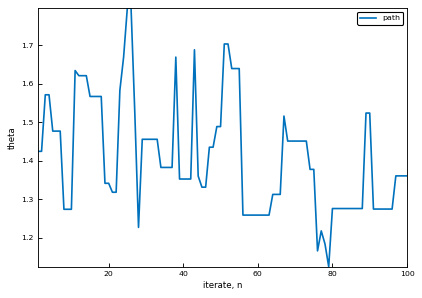

In [20]:
print(prop)

print(tvec[NB:NB+20])

chain = tvec[NB:]

print(len(chain))
len(range(1,N+1))


# Plot
fig, ax = myfigure()

ax.plot(range(1,N+1), chain, label='path')
ax.set_xlabel('iterate, n')
ax.set_ylabel('theta')    
leg = ax.legend();

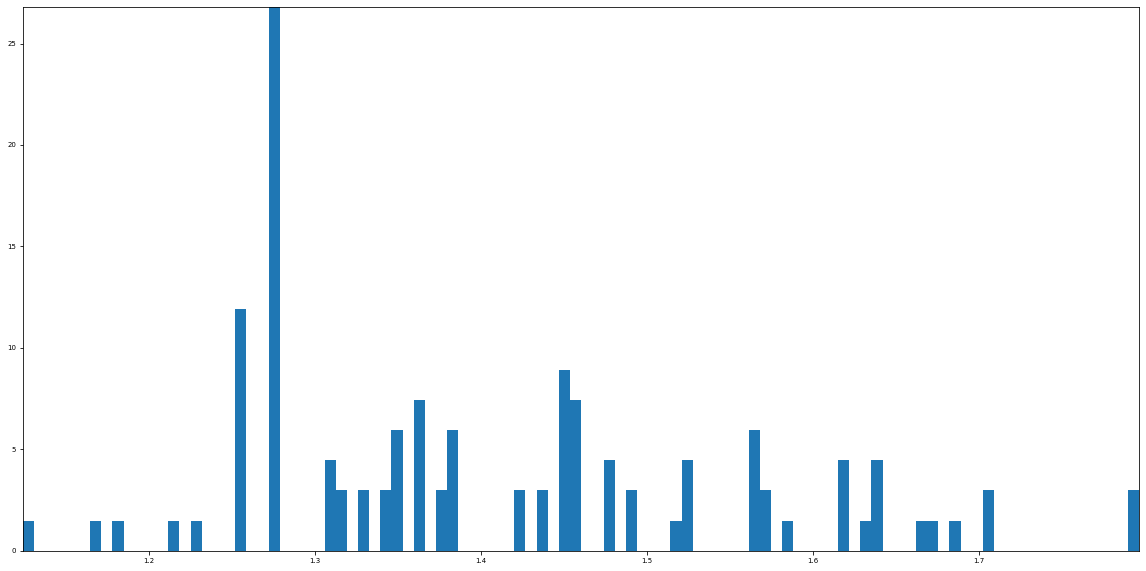

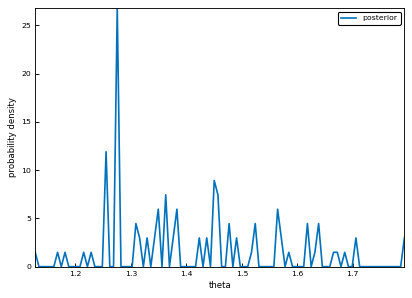

In [21]:
# Histogram results


# 
hist, bin_edges = np.histogram(chain, 100, density=1)

bin_centres = (bin_edges[1:] + bin_edges[:-1])/2

#print(bin_edges)
#print(bin_centres)

# Plot histogram (inbuilt function)
plt.hist(chain, bins=100, density=1)


# Plot histogram manually.
fig, ax = myfigure()

ax.plot(bin_centres, hist, label='posterior')
ax.set_xlabel('theta')
ax.set_ylabel('probability density')    
leg = ax.legend();


In [22]:
for i in range(1,4):
    print(i)

1
2
3


In [23]:
x = [[1,2,3,4,5], [6,7,8,9,10]]
print(x)

print(x[0][:])

print(np.arange(1,4))

y = [0,1,2,3,4,5,6,7,8,9,10,11]
print(y[4:8])

print(2/1)

print(x[0]*x[1])

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
[1, 2, 3, 4, 5]
[1 2 3]
[4, 5, 6, 7]
2.0


TypeError: can't multiply sequence by non-int of type 'list'

In [ ]:
x = np.array([6,1,0,3,4])
print(x)


y = [3,6,7,3,9]
print(y)

print(x[x==0])

x[x==0] = 99
print(x)

x/y

In [ ]:
2**2

In [32]:
np.linspace(2,5,4)

array([2., 3., 4., 5.])

In [30]:
Nt = int(400)
NC = int(5)
N = int(10000)
NN = np.log10(N)-np.log10(100)+1

print(NN)

np.zeros((Nt, NC, NN))

3.0


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [33]:
np.count_nonzero([0,3,2])

2

In [43]:
x = np.array([1,2,0,4,0,0,7])

temp = np.zeros(len(x))

temp[np.where((x!=0) & (x ==1))] = 99

print(temp)

[99.  0.  0.  0.  0.  0.  0.]


In [56]:
x = np.array([1,2,0,4,0,0,7])
p = np.array([1,2,0,4,0,0,7])
q = np.array([8,9,3,5,5,6,7])


temp = np.zeros(len(x))
temp[np.where((p!=0) & (q!=0))] = p[np.where((p!=0) & (q!=0))]*np.log(p[np.where((p!=0) & (q!=0))]/q[np.where((p!=0) & (q!=0))])
temp[np.where(p==0)] = 0
temp[np.where(q==0)] = 0

# Approximate integral.
KL = np.trapz(temp, x)

print(np.where((p!=0) & (q!=0)))
print(p[np.where((p!=0) & (q!=0))])
print(q[np.where((p!=0) & (q!=0))])
print(np.log(p[np.where((p!=0) & (q!=0))]/q[np.where((p!=0) & (q!=0))]))
print(len(x))
print(temp)
print(KL)

(array([0, 1, 3, 6]),)
[1 2 4 7]
[8 9 5 7]
[-2.07944154 -1.5040774  -0.22314355  0.        ]
7
[-2.07944154 -3.00815479  0.         -0.89257421  0.          0.
  0.        ]
0.4643566259363565
